### Milestone 3 - Instructions
Create a new notebook and perform each of the following tasks and answer the related questions:

- Build a simple neural networks model
- Build a DNN model
- Build a RNN model
- Summarize your findings with examples.  Explain what the manufacturer should focus on to optimize the diaper manufacturing process.
- Solicit specific feedback on your code (instructions below).

In [159]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.layers import Dropout, Dense, Embedding, LSTM, Bidirectional


### Read in data

In [160]:
# assign url variable where we will pull data from
url_data = "https://archive.ics.uci.edu/ml/machine-learning-databases/secom/secom.data"

In [161]:
# add generic feature column names
names = ["feature" + str(x) for x in range(1, 591)]

In [162]:
# pull down the csv info into a pandas dataframe
data = pd.read_csv(url_data, sep=" ", names=names, header=None, dtype=None)

In [163]:
# check head of data 
data.head()

,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,...,feature581,feature582,feature583,feature584,feature585,feature586,feature587,feature588,feature589,feature590
0,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,0.0162,...,NaN,NaN,0.5005,0.0118,0.0035,2.3630,NaN,NaN,NaN,NaN
1,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,-0.0005,...,0.0060,208.2045,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045
2,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,0.0041,...,0.0148,82.8602,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602
3,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.4882,-0.0124,...,0.0044,73.8432,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432
4,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5031,-0.0031,...,NaN,NaN,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432


In [164]:
# assign url variable where we will pull classification data from
url_classifications = "https://archive.ics.uci.edu/ml/machine-learning-databases/secom/secom_labels.data"

In [165]:
# assign classification and date to labels
labels = pd.read_csv(url_classifications, sep=" ", names = ["classification","date"],parse_dates = ["date"])

### Merge data

In [166]:
# merge data with classification labels
df = pd.concat([data,labels], axis=1)

### Clean and prepare data

According to dataset information this data contains null values varying in intensity depending on the individuals features. 

The data is represented in a raw text file each line representing an individual example and the features seperated by spaces. The null values are represented by the 'NaN' value as per MatLab.

In [167]:
#replace missing values with median values
df.fillna(data.median(), inplace=True)

In [168]:
print(df.isnull().sum())

feature1          0
feature2          0
feature3          0
feature4          0
feature5          0
                 ..
feature588        0
feature589        0
feature590        0
classification    0
date              0
Length: 592, dtype: int64


In [169]:
# drop the date column
df = df.drop(['date'], axis=1)

In [170]:
# remove all columns with 0 std 
df = df.loc[:, df.std() > .0]

### Explore data

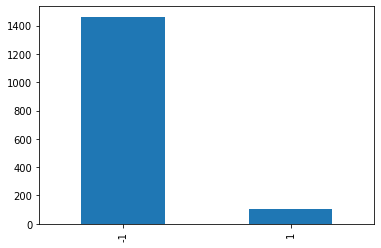

In [171]:
df['classification'].value_counts().plot(kind = 'bar')

### Handle class imbalance problem

#### Define predicators and target

X = All features minus the target, column "classification"

y = classification - simple pass/fail yield for in house line testing

In [172]:
# define X 
X = df.drop('classification', axis=1)

# define y
y = df['classification']

In [173]:
# use SMOTE to resample data from X, y
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_sample(X, y)
print('Resampled dataset shape {}'.format(Counter(y_res)))

Resampled dataset shape Counter({-1: 1463, 1: 1463})


In [174]:
# combine resampled x and y into new dataframe
resampled = pd.DataFrame(X_res, columns=X.columns)

resampled['classification'] = y_res

In [175]:
resampled.head()

,feature1,feature2,feature3,feature4,feature5,feature7,feature8,feature9,feature10,feature11,...,feature582,feature583,feature584,feature585,feature586,feature587,feature588,feature589,feature590,classification
0,3030.93,2564.00,2187.7333,1411.1265,1.3602,97.6133,0.1242,1.5005,0.0162,-0.0034,...,72.2889,0.5005,0.0118,0.0035,2.3630,0.0205,0.0148,0.0046,71.9005,-1
1,3095.78,2465.14,2230.4222,1463.6606,0.8294,102.3433,0.1247,1.4966,-0.0005,-0.0148,...,208.2045,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045,-1
2,2932.61,2559.94,2186.4111,1698.0172,1.5102,95.4878,0.1241,1.4436,0.0041,0.0013,...,82.8602,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602,1
3,2988.72,2479.90,2199.0333,909.7926,1.3204,104.2367,0.1217,1.4882,-0.0124,-0.0033,...,73.8432,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432,-1
4,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.3967,0.1235,1.5031,-0.0031,-0.0072,...,72.2889,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432,-1


In [176]:
# redefine X 
X = resampled.drop('classification', axis=1)

# redefine y
Y = resampled['classification']

### Split the data into training and testing sets

In [177]:
# split into a training and testing set
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=5)

### Build a simple neural networks model

### Build a DNN model

In [178]:
x_train

,feature1,feature2,feature3,feature4,feature5,feature7,feature8,feature9,feature10,feature11,...,feature581,feature582,feature583,feature584,feature585,feature586,feature587,feature588,feature589,feature590
1778,3065.590357,2554.018010,2239.066660,1459.259069,1.756294,102.077025,0.119660,1.438020,0.005060,0.006540,...,0.004700,72.288900,0.503040,0.010460,0.003190,2.085128,0.026650,0.013950,0.004570,52.572526
441,3102.590000,2514.950000,2196.088900,1277.859200,1.824600,95.632200,0.122400,1.472700,-0.000500,-0.007600,...,0.004700,72.288900,0.500200,0.016200,0.004100,3.246600,0.032900,0.005500,0.002200,16.669500
52,2938.410000,2466.780000,2166.522200,907.074600,1.064700,104.521100,0.122100,1.471000,0.044200,0.014600,...,0.006400,50.871300,0.498700,0.010600,0.003200,2.135600,0.035800,0.018200,0.006400,50.871300
1983,2977.935423,2373.440416,2171.779115,1151.744525,1.207409,101.097817,0.121995,1.549579,0.013609,0.005740,...,0.003850,58.474471,0.498650,0.009780,0.002580,1.958154,0.027196,0.013200,0.003610,51.131419
1603,2956.527885,2536.652323,2183.191911,995.962387,1.348479,104.080694,0.122884,1.529538,-0.023359,-0.003883,...,0.007306,112.416712,0.494457,0.013775,0.003619,2.787776,0.026678,0.020775,0.007306,112.416712
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,2988.832251,2518.943892,2227.941084,1380.972197,1.548322,107.313477,0.122713,1.464299,-0.004470,-0.011010,...,0.004700,72.288900,0.501250,0.012642,0.003678,2.523518,0.029922,0.022965,0.006550,84.970087
1424,3077.470000,2387.730000,2180.888900,1084.722100,0.908500,94.246700,0.122600,1.314500,0.041000,-0.020900,...,0.004700,72.288900,0.497700,0.015100,0.004000,3.033000,0.023200,0.011900,0.003900,51.472600
1725,3090.201242,2524.409307,2195.395247,1345.746906,1.112359,100.135905,0.123700,1.415041,-0.004198,-0.001794,...,0.004700,72.288900,0.501121,0.010838,0.002700,2.161356,0.020761,0.008666,0.002752,41.905874
2254,2904.618155,2475.227573,2172.937599,925.868956,1.047679,103.826351,0.121855,1.531818,-0.020960,0.003357,...,0.004765,99.013260,0.502779,0.013103,0.003080,2.602076,0.023556,0.013508,0.004206,81.909187


#### Configure the layers

In [179]:
model = Sequential()
model.add(Dense(100, activation='relu', input_dim=474))
model.add(Dropout(rate=0.1))
model.add(Dense(1, activation='softmax'))

#### Compilation - configure the learning process including defining the optimizer, loss function, and metric.

In [180]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

#### Train model  with our training data and by defining the number of epochs.

In [181]:
model.fit(x_train, y_train, epochs=5)

Epoch 1/5
2340/2340 [==============================] - 1s 423us/step - loss: 15.9288 - acc: 0.5004
Epoch 2/5
2340/2340 [==============================] - 0s 45us/step - loss: 15.9288 - acc: 0.5004
Epoch 3/5
2340/2340 [==============================] - 0s 47us/step - loss: 15.9288 - acc: 0.5004
Epoch 4/5
2340/2340 [==============================] - 0s 44us/step - loss: 15.9288 - acc: 0.5004
Epoch 5/5
2340/2340 [==============================] - 0s 46us/step - loss: 15.9288 - acc: 0.5004


#### Apply model to test set and evaluate accuracy

In [182]:
test_loss, test_acc = model.evaluate(x_test, y_test)

print('Test accuracy:', test_acc)

586/586 [==============================] - 0s 586us/step
Test accuracy: 0.4982935157652194


### Build a RNN model

In [100]:
model = Sequential()
# Embedding layer to convert input to dense vector representations
model.add(Dense(32, activation='relu', input_dim=474))
# layer - LSTM
model.add(LSTM(128))
# layer - # of nodes/neurons with relu activation function
model.add(Dense(1, activation = 'softmax'))

ValueError: Input 0 is incompatible with layer lstm_2: expected ndim=3, found ndim=2

### Describe Findings

### Instructions to Solicit Feedback
Write 2-3 questions soliciting feedback on specific aspects on the assignment. For example, if you did something one way but are unsure if there might be a different or better way to do it, ask for feedback on that part. You may submit these questions by commenting out in the code within your .ipynb file or by typing them below your file name in the Your Response box on the Submit Milestone Assignment page. While the questions you submit will have no bearing on your grade, by doing so, you will engage more actively with the assignment and we will also be able to give you pointed feedback.

1. How can I fix the convegence issue I have with svm.LinearSVC? From what I've found on Stackoverflow, the common response is to increase the iterations. I went from 1000 to 100000; however, still received this error. 
 

2. I did not find a difference in performace (accuracy) using thw whole dataset vs. a limited dataset (after dimensionality reduction) when using Decision Tree or Random Forest. Is that normal? If not, how and when should I use dimensionality reduction for these models moving forward? 